# * GRIP - The Spark Foundation 

#  * Data Science & Business Analytics Internship

# *  Task 1

 *  Predict the percentage of marks of an student based on the number of study hours

# *  Prediction

*  To predict the score of a student who studies for 9.25 hrs/ day .We will predict the marks of that a student is expected to score based upon the number of hours they studied.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\ai and ml\student_scores - student_scores.csv")
print("Here we go our data is loaded")
df

Here we go our data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

In [32]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


DESCRIPTON OF THE DATASET


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

Exploring the DataSet

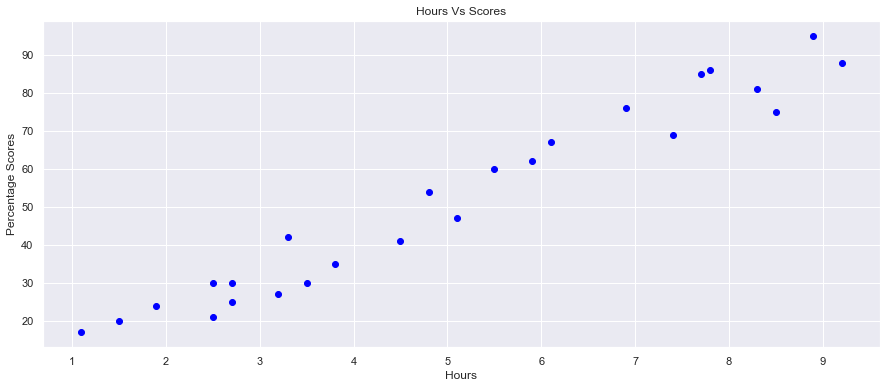

In [45]:
plt.scatter(df['Hours'], df['Scores'], color='Blue',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E6CBD5668>,
      dtype=object)

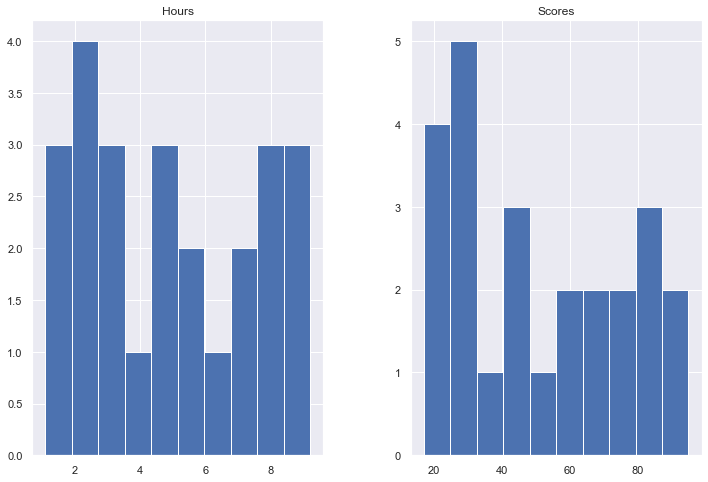

In [33]:
df.hist(figsize=(12,8))

A histogram gives us an idea about nature of distribution of data i.e. whether the data is normally distributed or it is skewed either positively or negetively. In the above histogram, we can observe for both Hours and Scores, there is a very minor skew in the positive side because many of the data points lies in this region though this very slight skew does not indicate that outliers are present in the data.

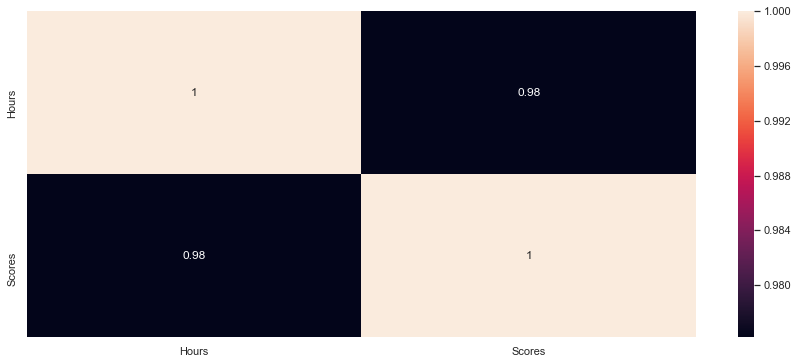

In [49]:
sns.heatmap(df.corr(), annot=True)

In [15]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Hours and Scores are highly Positively correlated to each other

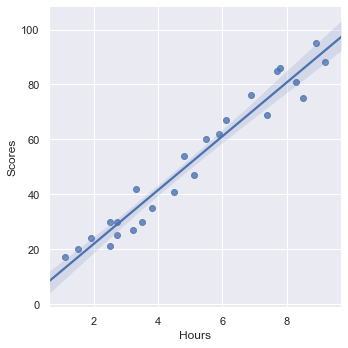

In [55]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=df)

 * Implot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

From the graph above, we can clearly observe that there is a positive linear relationship between the number of hours studied and the scores obtained. We can say that with the increase of Hours studied(x), there is an increase in the scores obtained(y).

skewness of scores is : 0.2339646665397317


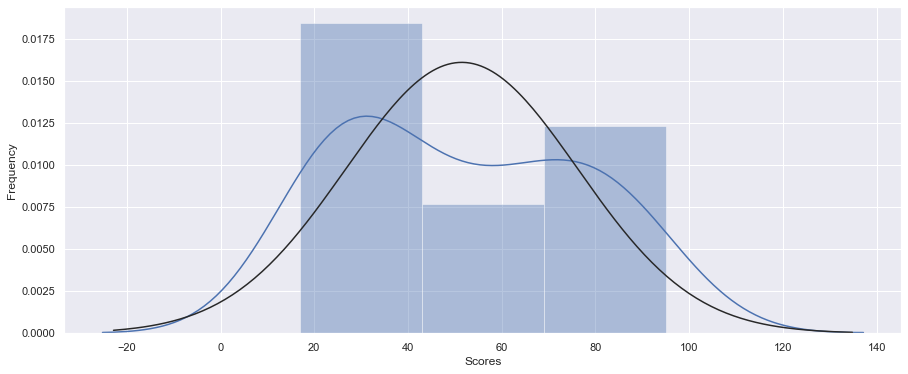

In [18]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

print("skewness of scores is :", df["Scores"].skew())
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(df['Scores'],fit=norm)
(mu, sig) = norm.fit(df['Scores'])
plt.ylabel('Frequency')
plt.show()

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple Linear Regression model on the Training set

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [39]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


# Visualising the Training set results

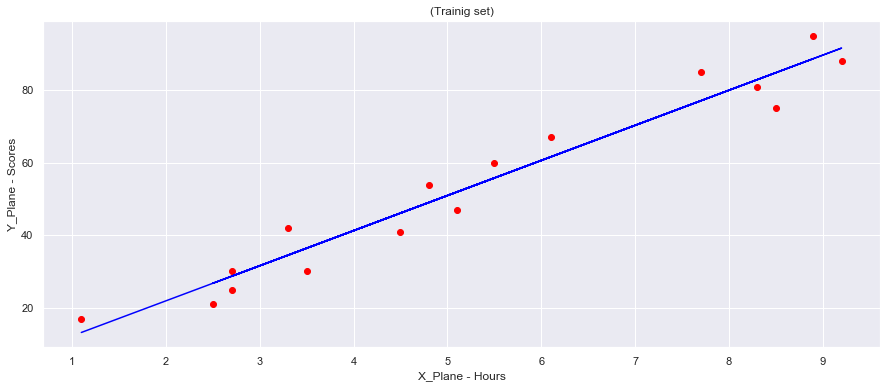

In [41]:
# PLotting the training set
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('X_Plane - Hours')
plt.ylabel('Y_Plane - Scores')
plt.show()


# Visualising the Test set results

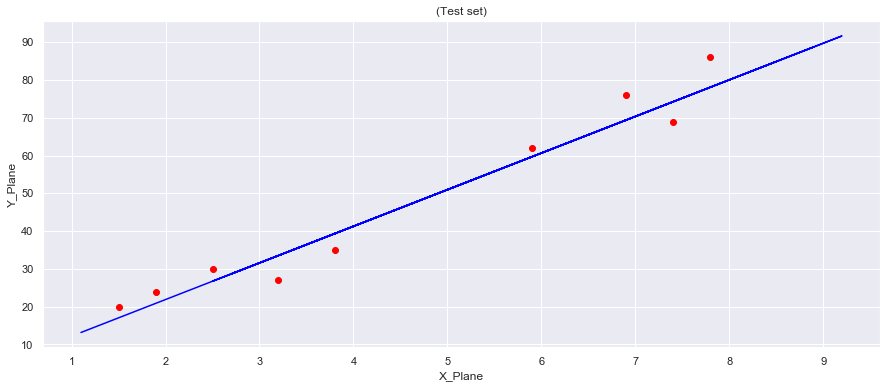

In [42]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('X_Plane')
plt.ylabel('Y_Plane')
plt.show()

# Evaluating the model - to check its perfomance

In [43]:
#calculating r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.955570080138813

R-squared is a goodness-of-fit measure for linear regression models.
As we can see that R-squared value is approx 0.955. r squared value basically tells us how much variance is explaned by dependent variable is explained by independent variables. In this case, around 95.5% of variance is explained which is a very good score as per industry standards.

In [44]:
#To find the error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

25.463280738222547

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs

# Visualizing the differences between actual Scores and predicted Scores

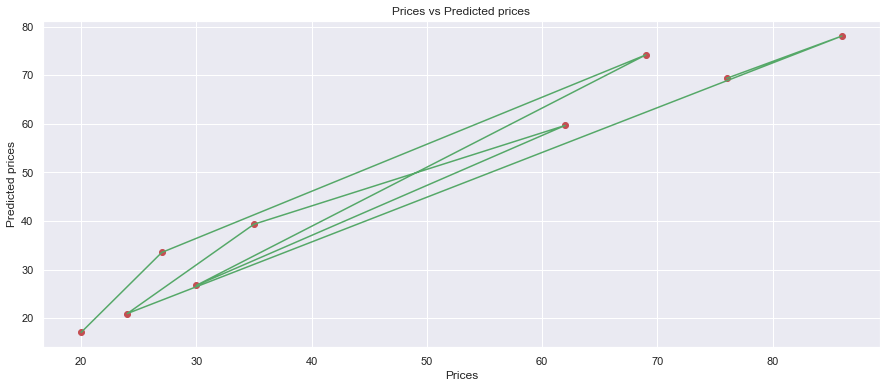

In [50]:

plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='g')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

# You can also test with your own data

In [53]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 92.14523314523314
